In [1]:
import torch
import os
import pandas as pd
import os

from torch.distributions import multinomial
from d2l import torch as d2l

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
# 写入数据集
os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n') # 列名
    f.write('NA,Pave,127500\n') # 每⾏表⽰⼀个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [3]:
# 读取数据集
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [4]:
# 处理缺失值
# iloc位置索引
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
# 使用均值法来插入NaN值
inputs = inputs.fillna(inputs.mean())
print(inputs)
# 处理离散值
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN
   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [5]:
# 转换为张量格式
# 现在inputs和outputs中的所有条⽬都是数值类型，
# 它们可以转换为张量格式

X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

In [6]:
# 蒙特卡洛采样
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(100000000, fair_probs).sample() / 100000000

tensor([0.1666, 0.1666, 0.1667, 0.1667, 0.1667, 0.1668])

tensor([[  4.,   1.,   0.,   0.,   3.,   2.],
        [  6.,   3.,   2.,   1.,   5.,   3.],
        [  8.,   5.,   4.,   3.,   7.,   3.],
        ...,
        [814., 852., 852., 806., 853., 803.],
        [816., 858., 852., 806., 853., 805.],
        [816., 862., 854., 808., 854., 806.]])
tensor([[0.4000, 0.1000, 0.0000, 0.0000, 0.3000, 0.2000],
        [0.3000, 0.1500, 0.1000, 0.0500, 0.2500, 0.1500],
        [0.2667, 0.1667, 0.1333, 0.1000, 0.2333, 0.1000],
        ...,
        [0.1635, 0.1711, 0.1711, 0.1618, 0.1713, 0.1612],
        [0.1635, 0.1719, 0.1707, 0.1615, 0.1709, 0.1613],
        [0.1632, 0.1724, 0.1708, 0.1616, 0.1708, 0.1612]])


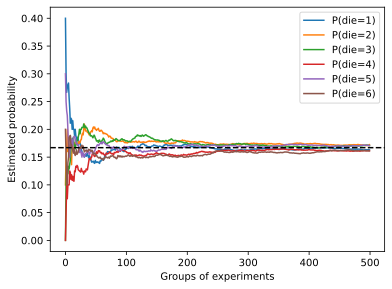

In [10]:
# 进行500组实验，每次采样10个
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
print(cum_counts)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
print(estimates)
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
        label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [17]:
list??

In [13]:
help(torch.ones)

Help on built-in function ones:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the cur